#### Nama : Rahmatul Idami
#### NPM : 2108017010071

#### ANN untuk tugas 2 yang regresi

Datasetnya yang digunakan yaitu Data transaksi apartemen yang dihasilkan dari Agustus 2007 - Agustus 2017 di Daebong, kota Daegu, Korea Selatan. Dataset ini terdiri dari 30 fitur dan 5891 data yang di download [disini](https://www.kaggle.com/datasets/gunhee/koreahousedata)

Berikut fitur yang ada dalam dataset Apartment data yaitu:
- SalePrice : Price in US dollar (target feature)
- YearBuilt 
- YrSold
- MonthSold
- Size(sqf)
- Floor
- HallwayType
- HeatingType
- AptManageType
- N_Parkinglot(Ground)
- N_Parkinglot(Basement)
- TimeToBusStop
- TimeToSubway
- N_APT
- N_manager
- N_elevators
- SubwayStation
- N_FacilitiesNearBy(PublicOffice)
- N_FacilitiesNearBy(Hospital)
- N_FacilitiesNearBy(Dpartmentstore)
- N_FacilitiesNearBy(Mall)
- N_FacilitiesNearBy(ETC)
- N_FacilitiesNearBy(Park)
- N_SchoolNearBy(Elementary)
- N_SchoolNearBy(Middle)
- N_SchoolNearBy(High)
- N_SchoolNearBy(University)
- N_FacilitiesInApt
- N_FacilitiesNearBy(Total)
- N_SchoolNearBy(Total)

####  Mengimport Library yang dibutuhkan dan membaca dataset

In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [2]:
dataset = pd.read_csv('Dataset/Daegu_data.csv')
dataset

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [3]:
dataset.dtypes

SalePrice                               int64
YearBuilt                               int64
YrSold                                  int64
MonthSold                               int64
Size(sqf)                               int64
Floor                                   int64
HallwayType                            object
HeatingType                            object
AptManageType                          object
N_Parkinglot(Ground)                  float64
N_Parkinglot(Basement)                float64
TimeToBusStop                          object
TimeToSubway                           object
N_APT                                 float64
N_manager                             float64
N_elevators                           float64
SubwayStation                          object
N_FacilitiesNearBy(PublicOffice)      float64
N_FacilitiesNearBy(Hospital)            int64
N_FacilitiesNearBy(Dpartmentstore)    float64
N_FacilitiesNearBy(Mall)              float64
N_FacilitiesNearBy(ETC)           

Menampilkan tipe data dari setiap fitur yang ada pada dataset.

#### Menghapus fitur yang tidak dibutuhkan

In [4]:
# Menentukan fitur yang tidak diperlukan
fitur_tidak_diperlukan = ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway','SubwayStation', 'YearBuilt', 'YrSold']

# Menghapus fitur yang tidak diperlukan dari DataFrame
df = dataset.drop(fitur_tidak_diperlukan, axis=1)


Fitur diatas saya hapus karena menurut saya fitur diatas tidak terlalu mempengaruhi harga jual dari apartemen.

In [5]:
df.head()

,SalePrice,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,8,814,3,111.0,184.0,3.0,3.0,0.0,2.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,8,587,8,80.0,76.0,1.0,2.0,2.0,5.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,8,587,6,80.0,76.0,1.0,2.0,2.0,5.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,8,2056,8,249.0,536.0,6.0,5.0,11.0,1.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,8,1761,3,523.0,536.0,8.0,8.0,20.0,6.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [6]:
df.tail()

,SalePrice,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
5886,511504,8,1643,19,0.0,1270.0,7.0,14.0,16.0,3.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,8,903,13,123.0,181.0,3.0,3.0,11.0,3.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,8,868,20,0.0,1270.0,7.0,14.0,16.0,3.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,8,1327,1,87.0,0.0,2.0,1.0,4.0,3.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0
5890,393805,8,868,13,0.0,1270.0,7.0,14.0,16.0,3.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0


In [7]:
# mengecek tidak ada missing values
df.isnull().sum()

SalePrice                             0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
N_APT                                 0
N_manager                             0
N_elevators                           0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0
N_SchoolNearBy(High)                  0
N_SchoolNearBy(University)            0
N_FacilitiesInApt                     0
N_FacilitiesNearBy(Total)             0
N_SchoolNearBy(Total)                 0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalePrice,5891.0,221218.112545,106384.186446,32743.0,144247.0,207964.0,291150.0,585840.0
MonthSold,5891.0,6.160244,3.387752,1.0,3.0,6.0,9.0,12.0
Size(sqf),5891.0,955.569173,382.464050,135.0,644.0,910.0,1149.0,2337.0
Floor,5891.0,12.026311,7.548743,1.0,6.0,11.0,17.0,43.0
N_Parkinglot(Ground),5891.0,195.883551,218.597210,0.0,11.0,100.0,249.0,713.0
N_Parkinglot(Basement),5891.0,570.761670,408.621075,0.0,184.0,536.0,798.0,1321.0
N_APT,5891.0,5.613648,2.811831,1.0,3.0,7.0,8.0,13.0
N_manager,5891.0,6.310304,3.174088,1.0,5.0,6.0,8.0,14.0
N_elevators,5891.0,11.145985,7.806232,0.0,5.0,11.0,16.0,27.0
N_FacilitiesNearBy(PublicOffice),5891.0,4.141572,1.793496,0.0,3.0,5.0,5.0,7.0


#### Pearson Correlation Matrix

<Axes: title={'center': 'Pearson Correlation Matrix'}>

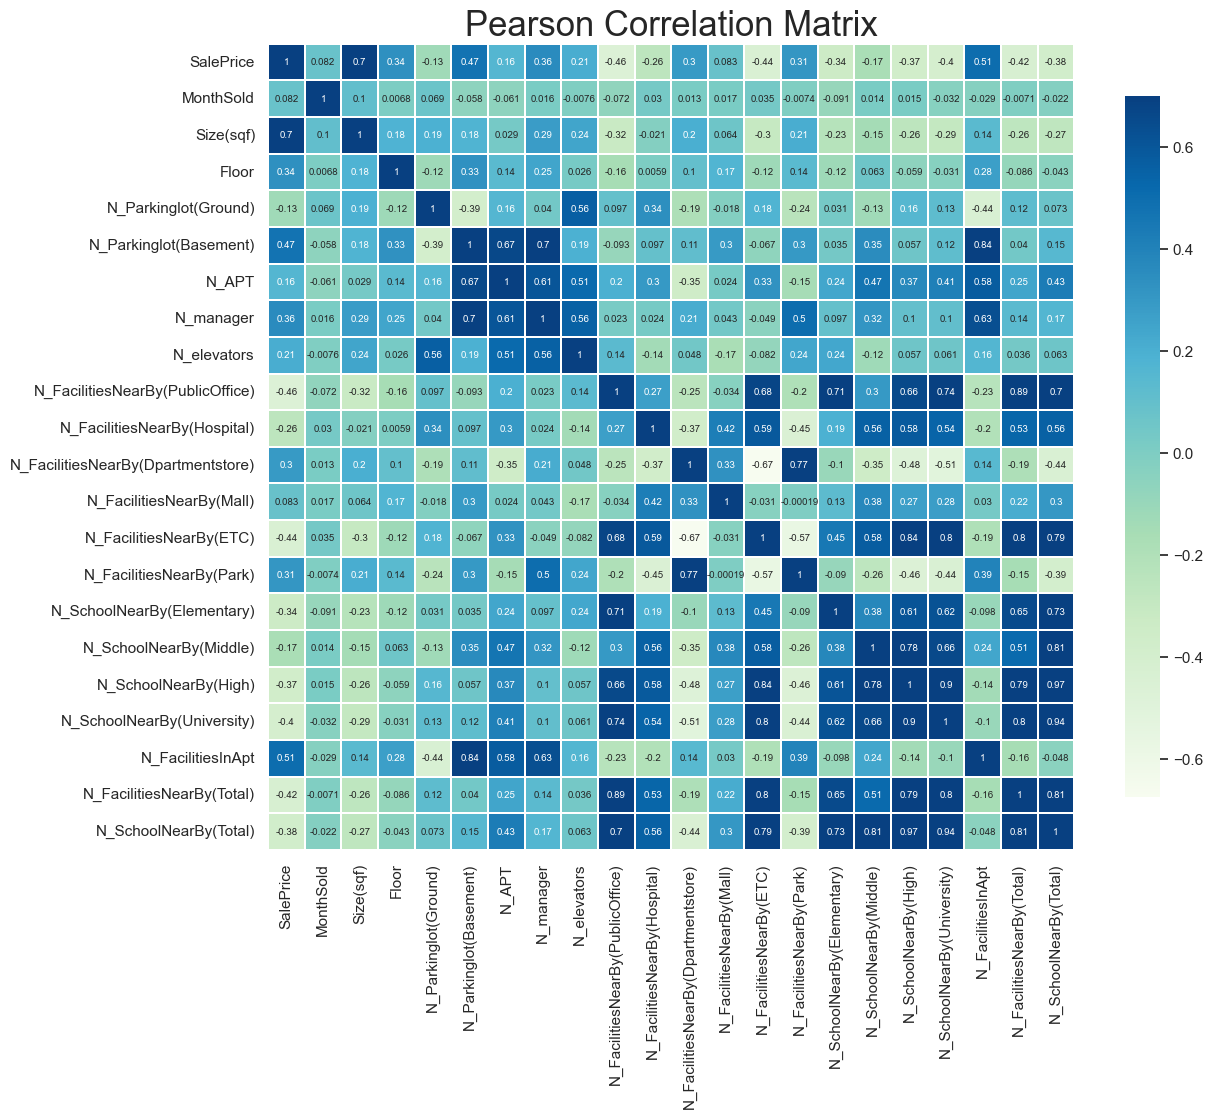

In [9]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

Saya menggunakan koefisien korelasi Pearson untuk memeriksa kekuatan dan arah hubungan linear antara dua variabel kontinu.

Koefisien korelasi dapat memiliki nilai dari -1 hingga +1. Semakin besar nilai absolut koefisien, semakin kuat hubungan antara variabel. Untuk korelasi Pearson, nilai absolut 1 menunjukkan hubungan linear yang sempurna. Korelasi yang mendekati 0 menunjukkan tidak adanya hubungan linear antara variabel.

#### Mengurutkan korelasi antar SalePrice dengan fitur lain dari yang terbesar

In [10]:
price_corr = df.corr()['SalePrice'].sort_values(ascending=False)
print(price_corr)

SalePrice                             1.000000
Size(sqf)                             0.697199
N_FacilitiesInApt                     0.505282
N_Parkinglot(Basement)                0.473252
N_manager                             0.358329
Floor                                 0.336729
N_FacilitiesNearBy(Park)              0.310906
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_elevators                           0.208248
N_APT                                 0.162684
N_FacilitiesNearBy(Mall)              0.082979
MonthSold                             0.081924
N_Parkinglot(Ground)                 -0.130549
N_SchoolNearBy(Middle)               -0.166439
N_FacilitiesNearBy(Hospital)         -0.257282
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(High)                 -0.371840
N_SchoolNearBy(Total)                -0.377904
N_SchoolNearBy(University)           -0.403080
N_FacilitiesNearBy(Total)            -0.419763
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesN

#### Menghapus kolom yang korelasinya paling kecil

In [11]:
# Menghapus kolom-kolom yang tidak diperlukan
kolom_dihapus = ['N_Parkinglot(Ground)', 'N_SchoolNearBy(Middle)', 'N_FacilitiesNearBy(Hospital)',
                 'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(High)', 'N_SchoolNearBy(Total)',
                 'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(Total)', 'N_FacilitiesNearBy(ETC)',
                 'N_FacilitiesNearBy(PublicOffice)']
df = df.drop(kolom_dihapus, axis=1)

Jadi. fitur atau kolom yang memiliki korelasi dibawah -0.130549 saya hapus karena sangat kecil korelasinya

In [12]:
# Menampilkan dataset setelah kolom-kolom dihapus
df.head()

,SalePrice,MonthSold,Size(sqf),Floor,N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(Park),N_FacilitiesInApt
0,141592,8,814,3,184.0,3.0,3.0,0.0,1.0,1.0,0.0,5
1,51327,8,587,8,76.0,1.0,2.0,2.0,2.0,1.0,1.0,3
2,48672,8,587,6,76.0,1.0,2.0,2.0,2.0,1.0,1.0,3
3,380530,8,2056,8,536.0,6.0,5.0,11.0,0.0,1.0,0.0,5
4,221238,8,1761,3,536.0,8.0,8.0,20.0,0.0,1.0,0.0,4


#### Membagi dataset menjadi test dan training set¶

In [13]:
# Fitur
X = df.drop('SalePrice',axis=1)

# Label
y = df['SalePrice']

# Membagi datasetnya
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4418, 11)
(1473, 11)
(4418,)
(1473,)


In [15]:
scaler = MinMaxScaler()

# Melakukan fitting dan transformasi
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Semua telah diskalakan antara 0 dan 1.
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


#### Membuat Model

In [16]:
model = Sequential()

# input layer
model.add(Dense(11,activation='relu'))

# hidden layers
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Kode tersebut membuat sebuah model neural network dengan arsitektur sebagai berikut:

- Input layer dengan 11 neuron dan fungsi aktivasi ReLU.
- Tiga hidden layers, masing-masing dengan 11 neuron dan fungsi aktivasi ReLU.
- Output layer dengan satu neuron.
- Model tersebut dikompilasi dengan menggunakan algoritma optimasi Adam dan fungsi loss Mean Squared Error (MSE).

#### Training model

In [17]:
model.fit(x=X_train,y=y_train.values, validation_data=(X_test,y_test.values), batch_size=10,epochs=100)

Epoch 1/100
442/442 [==============================] - 6s 8ms/step - loss: 60001103872.0000 - val_loss: 58438148096.0000
Epoch 2/100
442/442 [==============================] - 2s 5ms/step - loss: 46010638336.0000 - val_loss: 24569292800.0000
Epoch 3/100
442/442 [==============================] - 2s 5ms/step - loss: 11523987456.0000 - val_loss: 7256881152.0000
Epoch 4/100
442/442 [==============================] - 2s 5ms/step - loss: 7425862144.0000 - val_loss: 7156881408.0000
Epoch 5/100
442/442 [==============================] - 2s 5ms/step - loss: 7315099136.0000 - val_loss: 7052971520.0000
Epoch 6/100
442/442 [==============================] - 2s 6ms/step - loss: 7205159936.0000 - val_loss: 6942984704.0000
Epoch 7/100
442/442 [==============================] - 2s 5ms/step - loss: 7086947328.0000 - val_loss: 6833418752.0000
Epoch 8/100
442/442 [==============================] - 2s 5ms/step - loss: 6968909824.0000 - val_loss: 6721644032.0000
Epoch 9/100
442/442 [======================

442/442 [==============================] - 3s 7ms/step - loss: 2866750976.0000 - val_loss: 2872940032.0000
Epoch 70/100
442/442 [==============================] - 2s 5ms/step - loss: 2859955456.0000 - val_loss: 2897746432.0000
Epoch 71/100
442/442 [==============================] - 2s 5ms/step - loss: 2859417344.0000 - val_loss: 2859333888.0000
Epoch 72/100
442/442 [==============================] - 2s 5ms/step - loss: 2850426624.0000 - val_loss: 2856249856.0000
Epoch 73/100
442/442 [==============================] - 2s 5ms/step - loss: 2843383296.0000 - val_loss: 2849995008.0000
Epoch 74/100
442/442 [==============================] - 2s 5ms/step - loss: 2838453504.0000 - val_loss: 2844972032.0000
Epoch 75/100
442/442 [==============================] - 2s 5ms/step - loss: 2835018752.0000 - val_loss: 2841705984.0000
Epoch 76/100
442/442 [==============================] - 2s 5ms/step - loss: 2832409600.0000 - val_loss: 2845646592.0000
Epoch 77/100
442/442 [==============================]

#### Training loss per epoch

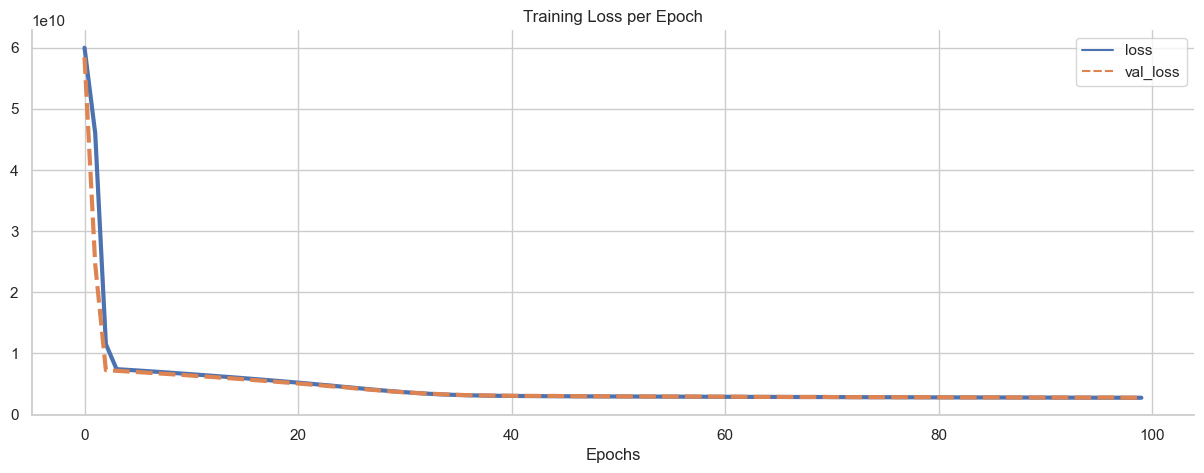

In [18]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

- Plot ini menunjukkan kerugian pelatihan per epoch. 
- Plot ini membantu kita melihat apakah terjadi overfitting pada model. 

#### Evaluasi data test

In [19]:
# Prediksi pada set data uji.
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['SalePrice'].describe())

47/47 [==============================] - 0s 5ms/step
MAE:  42117.47429711367
MSE:  2760456905.482738
RMSE:  52540.05048991425
Variance Regression Score:  0.7472741099555247


Descriptive Statistics:
 count      5891.000000
mean     221218.112545
std      106384.186446
min       32743.000000
25%      144247.000000
50%      207964.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64


#### Prediksi SalePrice apartement baru

In [20]:
# data baru untuk memprediksi Saleprice apartemen
single_apartment = {
    'MonthSold': [6], 
    'Size(sqf)': [900], 
    'Floor': [5], 
    'N_Parkinglot(Basement)': [200], 
    'N_APT': [5], 
    'N_manager': [3], 
    'N_elevators': [2], 
    'N_FacilitiesNearBy(Dpartmentstore)': [1], 
    'N_FacilitiesNearBy(Mall)': [1], 
    'N_FacilitiesNearBy(Park)': [0], 
    'N_FacilitiesInApt': [4]
}

# Buat DataFrame baru dengan nama fitur yang benar
single_apartment_df = pd.DataFrame(single_apartment)

# Scale fitur
single_apartment_scaled = scaler.transform(single_apartment_df)

# Jalankan model dan dapatkan prediksi harga
predicted_price = model.predict(single_apartment_scaled)[0, 0]
print('\nPredicted Price:', predicted_price)


1/1 [==============================] - 0s 41ms/step

Predicted Price: 164576.81


dari hasil diatas didapat harga prediksi untuk apartemen baru 164576.81 dollar.